In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Machine_Learning/Retail_Store_Inventory_Forecasting_Regression"

# **Data Science Life Cycle**

## **Business Understanding & Problem Definition**

## **Data Understanding & Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('retail_store_inventory.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

In [ ]:
print('unique values in key object columns :')
for col in ['Category', 'Region', 'Weather Condition', 'Seasonality'] :
  if col in df.columns :
    print(f'{col} : {df[col].unique()}')

## **Data Wrangling (Data Preparation/Cleaning)**

In [ ]:
df_processed =df.copy()

In [ ]:
df_processed['Date'] =pd.to_datetime(df_processed['Date'], errors='coerce')

In [ ]:
df_processed.head()

In [ ]:
df_processed.info()

In [ ]:
# Assuming 'df' is your DataFrame with 'Date' column as datetime type
if df_processed is not None and pd.api.types.is_datetime64_any_dtype(df_processed['Date']):
    print("\nExtracting temporal features from 'Date' column...")
    df_processed['Year'] = df_processed['Date'].dt.year

    df_processed['Month'] = df_processed['Date'].dt.month

    df_processed['DayOfMonth'] = df_processed['Date'].dt.day

    df_processed['DayOfWeek'] = df_processed['Date'].dt.dayofweek

    df_processed['DayOfYear'] = df_processed['Date'].dt.dayofyear

    df_processed['Quarter'] = df_processed['Date'].dt.quarter



In [ ]:
df_processed.head()

In [ ]:
df_processed.drop(columns=['Date', 'Store ID', 'Product ID'], inplace=True, axis =1)

In [ ]:
df_processed.head()

In [ ]:
df_processed =pd.get_dummies(df_processed, columns=['Category', 'Region', 'Weather Condition', 'Seasonality'], drop_first=True)

In [ ]:
df_processed.head()

In [ ]:
df_processed.shape

In [ ]:
df_processed.info()

## **Exploratory Data Analysis (EDA) & Data Visualization**

In [ ]:
df_processed.describe()

In [ ]:
# Group by Year and Month to get average Demand Forecast for each month-year combination
df_monthly_avg_trend = df_processed.groupby(['Year', 'Month'])['Demand Forecast'].mean().reset_index()

# Create a 'YearMonth' column for plotting (e.g., '2023-01', '2023-02')
# This helps in ordering the x-axis correctly for time series trend.
df_monthly_avg_trend['YearMonth'] = pd.to_datetime(
    df_monthly_avg_trend['Year'].astype(str) + '-' + df_monthly_avg_trend['Month'].astype(str)
    )

plt.figure(figsize=(15, 6))
sns.lineplot(x='YearMonth', y='Demand Forecast', data=df_monthly_avg_trend)
plt.title('Average Demand Forecast Trend Over Time (by Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Average Demand Forecast')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df_monthly_avg_overall = df_processed.groupby('Month')['Demand Forecast'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_monthly_avg_overall.index, y=df_monthly_avg_overall.values, palette='viridis')
plt.title('Average Monthly Demand Forecast (Overall)')
plt.xlabel('Month')
plt.ylabel('Average Demand Forecast')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df_dow_avg = df_processed.groupby('DayOfWeek')['Demand Forecast'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_dow_avg.index, y=df_dow_avg.values, palette='plasma')
plt.title('Average Demand Forecast by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Demand Forecast')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df_quarter_avg = df_processed.groupby('Quarter')['Demand Forecast'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=df_quarter_avg.index, y=df_quarter_avg.values, palette='cividis')
plt.title('Average Demand Forecast by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Demand Forecast')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

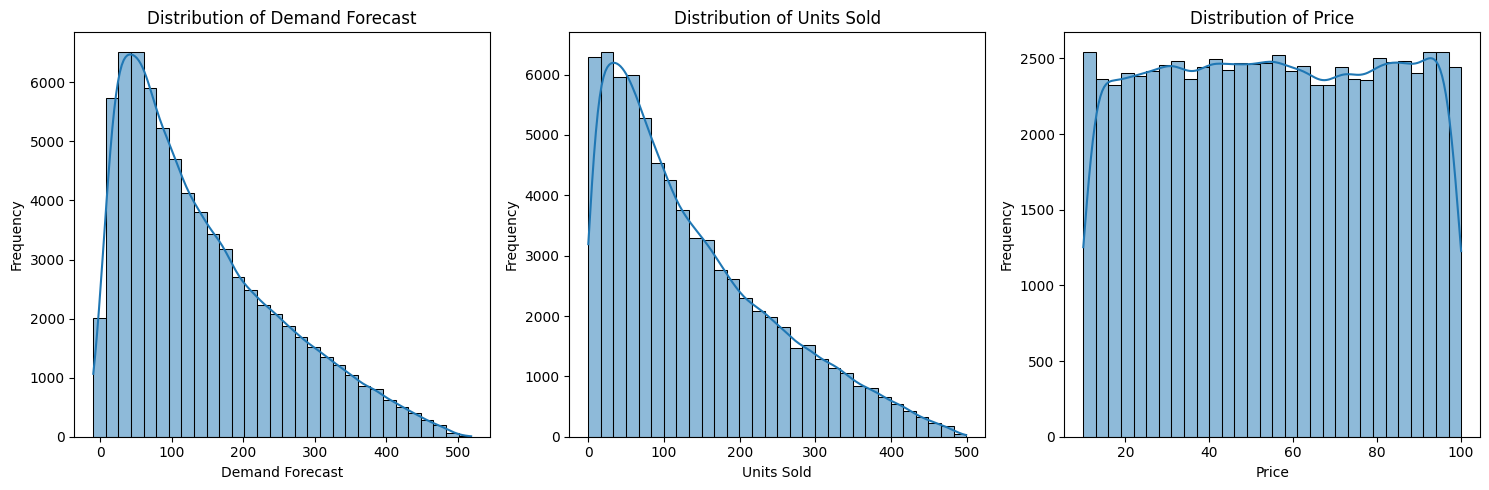

In [353]:
plt.figure(figsize=(15, 5))

# Plot 1: Distribution of Demand Forecast
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df_processed['Demand Forecast'], kde=True, bins=30)
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast')
plt.ylabel('Frequency')

# Plot 2: Distribution of Units Sold
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(df_processed['Units Sold'], kde=True, bins=30)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')

# Plot 3: Distribution of Price
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(df_processed['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


--- EDA Step 4.4: Impact of Categorical Features on Demand Forecast (using raw 'df') ---


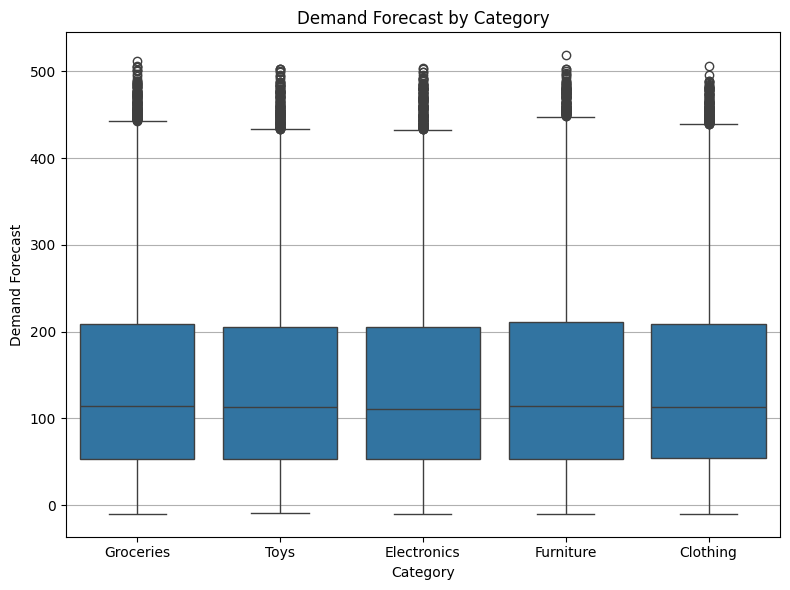


Observation for 'Demand Forecast by Category':
 - Compare the median Demand Forecast (middle line of the box) across categories in 'Category'.
 - Observe the spread (height of the box) and existence of outliers (dots outside whiskers) for each category.
 - Identify categories that seem to consistently have higher or lower demand.


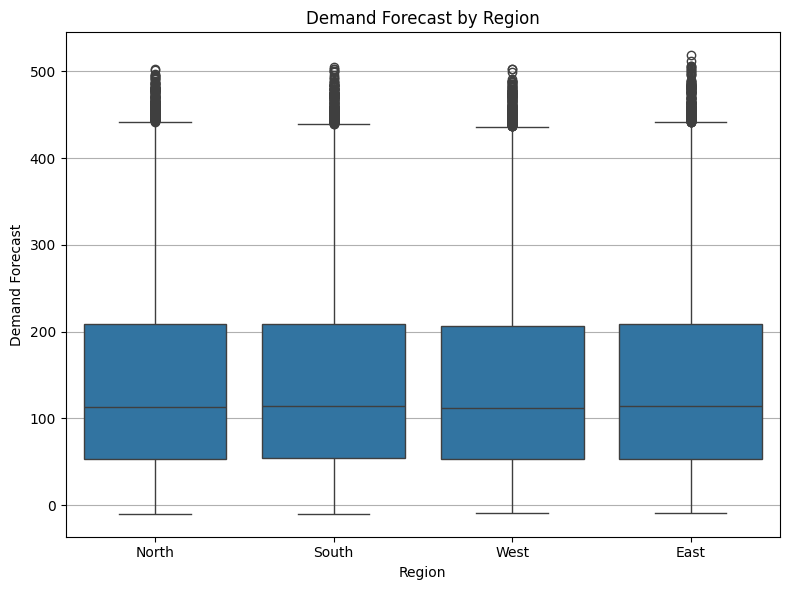


Observation for 'Demand Forecast by Region':
 - Compare the median Demand Forecast (middle line of the box) across categories in 'Region'.
 - Observe the spread (height of the box) and existence of outliers (dots outside whiskers) for each category.
 - Identify categories that seem to consistently have higher or lower demand.


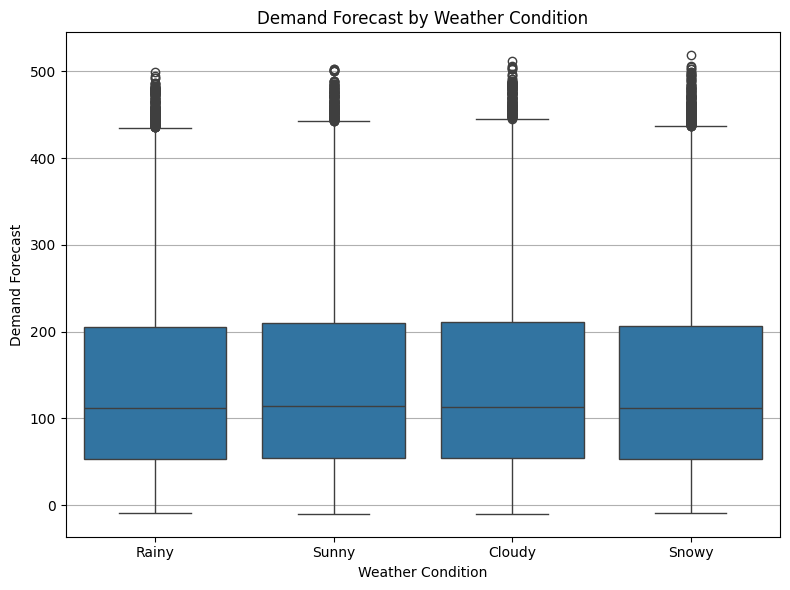


Observation for 'Demand Forecast by Weather Condition':
 - Compare the median Demand Forecast (middle line of the box) across categories in 'Weather Condition'.
 - Observe the spread (height of the box) and existence of outliers (dots outside whiskers) for each category.
 - Identify categories that seem to consistently have higher or lower demand.


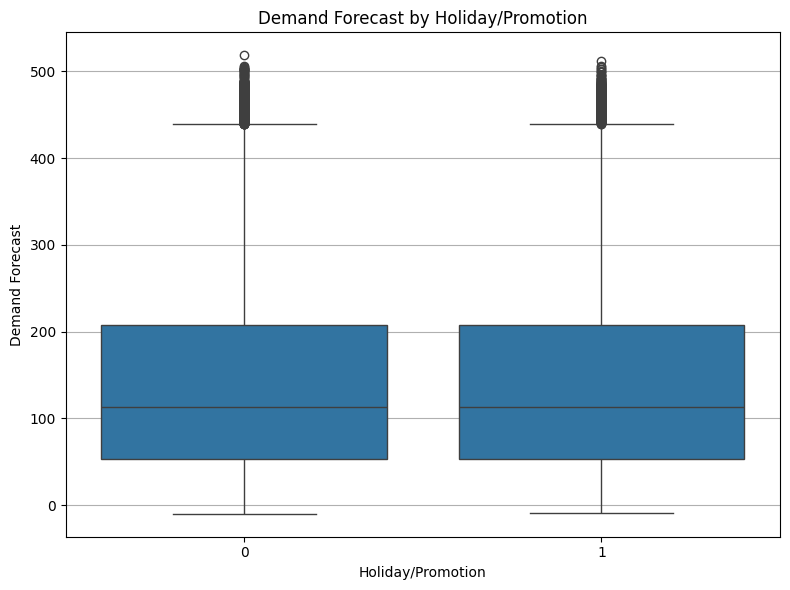


Observation for 'Demand Forecast by Holiday/Promotion':
 - Compare the median Demand Forecast (middle line of the box) across categories in 'Holiday/Promotion'.
 - Observe the spread (height of the box) and existence of outliers (dots outside whiskers) for each category.
 - Identify categories that seem to consistently have higher or lower demand.


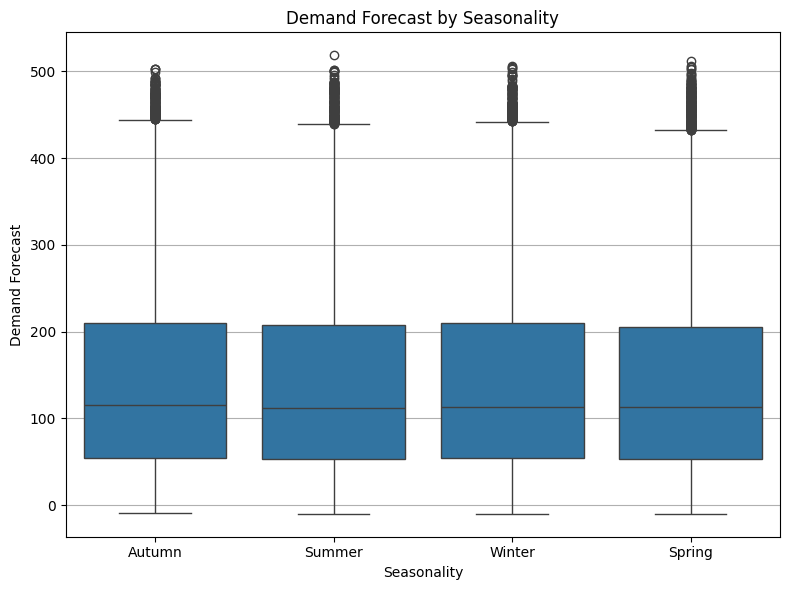


Observation for 'Demand Forecast by Seasonality':
 - Compare the median Demand Forecast (middle line of the box) across categories in 'Seasonality'.
 - Observe the spread (height of the box) and existence of outliers (dots outside whiskers) for each category.
 - Identify categories that seem to consistently have higher or lower demand.


In [354]:
categorical_features_to_plot = [
    'Category',
    'Region',
    'Weather Condition',
    'Holiday/Promotion',
    'Seasonality'
]

# Check if the necessary columns exist in the 'df' (raw data) DataFrame
if 'Demand Forecast' not in df.columns:
    print("Error: 'Demand Forecast' column not found in the raw 'df' DataFrame.")
else:
    print("\n--- EDA Step 4.4: Impact of Categorical Features on Demand Forecast (using raw 'df') ---")

    for col in categorical_features_to_plot:
        if col in df.columns: # Check if the column exists in the raw DataFrame
            # Check for too many unique values for a box plot (e.g., > 30)
            if df[col].nunique() > 30:
                print(f"Skipping boxplot for '{col}' as it has too many unique values ({df[col].nunique()}). Consider grouping or different visualization.")
                # You might want to plot a bar plot of top N categories instead in such cases
                # top_n = df[col].value_counts().nlargest(10).index
                # sns.barplot(x=col, y='Demand Forecast', data=df[df[col].isin(top_n)], estimator=np.mean)
                continue # Skip to the next column

            num_unique = df[col].nunique()

            plt.figure(figsize=(max(8, num_unique * 0.8), 6)) # Adjust figure size dynamically, min 8 wide
            sns.boxplot(x=col, y='Demand Forecast', data=df) # Use df (raw data) here
            plt.title(f'Demand Forecast by {col}')
            plt.xlabel(col)
            plt.ylabel('Demand Forecast')
            plt.grid(axis='y')

            if num_unique > 5:
                plt.xticks(rotation=45, ha='right')

            plt.tight_layout()
            plt.show()
            print(f"\nObservation for 'Demand Forecast by {col}':")
            print(f" - Compare the median Demand Forecast (middle line of the box) across categories in '{col}'.")
            print(f" - Observe the spread (height of the box) and existence of outliers (dots outside whiskers) for each category.")
            print(f" - Identify categories that seem to consistently have higher or lower demand.")
        else:
            print(f"Warning: '{col}' column not found in the raw 'df' DataFrame. Skipping plot for this column.")

Text(0, 0.5, 'Frequency')

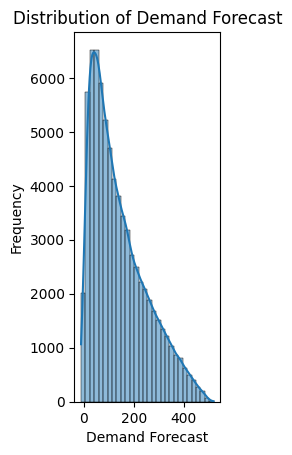

In [355]:
# Plot 1: Distribution of Demand Forecast
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df_processed['Demand Forecast'], kde=True, bins=30)
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast')
plt.ylabel('Frequency')

In [356]:
skewness = df_processed['Demand Forecast'].skew()
print(f"Skewness of Demand Forecast: {skewness}")

Skewness of Demand Forecast: 0.8948522530042673


## **Feature Engineering & Scaling**

In [357]:
df_processed['Demand Forecast'] = np.maximum(0, df_processed['Demand Forecast'])

In [358]:
df_processed.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Year,Month,DayOfMonth,DayOfWeek,DayOfYear,Quarter
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.528727,55.135108,10.009508,0.497305,55.146077,2022.502052,6.518468,15.700410,3.002736,182.751026,2.507524
std,129.949514,108.919406,52.277448,109.209174,26.021945,7.083746,0.499996,26.191408,0.502728,3.451564,8.807111,2.003429,105.509318,1.117404
min,50.000000,0.000000,20.000000,0.000000,10.000000,0.000000,0.000000,5.030000,2022.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000,2022.000000,4.000000,8.000000,1.000000,91.000000,2.000000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000,2023.000000,7.000000,16.000000,3.000000,183.000000,3.000000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000,2023.000000,10.000000,23.000000,5.000000,274.000000,4.000000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000,2024.000000,12.000000,31.000000,6.000000,365.000000,4.000000


In [359]:
df_processed['Demand Forecast_log'] =np.log1p(df_processed['Demand Forecast'])
df_processed['Demand Forecast_log'].skew()

np.float64(-1.2991680277705238)

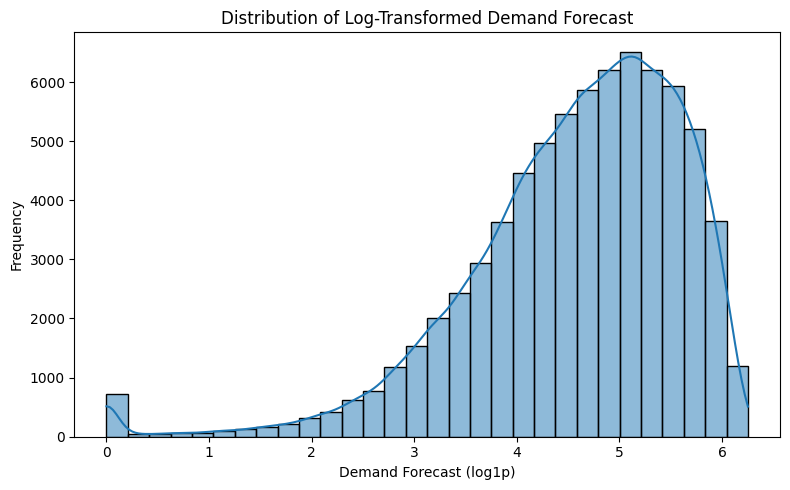

In [360]:
plt.figure(figsize=(8, 5))
sns.histplot(df_processed['Demand Forecast_log'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Demand Forecast')
plt.xlabel('Demand Forecast (log1p)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [361]:
df_processed.drop(columns=['Demand Forecast'], inplace=True, axis =1)
corr_matrix =df_processed.corr(numeric_only=True)

demand_forcast_correlations = corr_matrix['Demand Forecast_log']
print(demand_forcast_correlations.sort_values(ascending=False))

Demand Forecast_log        1.000000
Units Sold                 0.836542
Inventory Level            0.485302
DayOfMonth                 0.006855
Region_South               0.006025
Weather Condition_Sunny    0.005510
Seasonality_Winter         0.003721
Discount                   0.002793
Category_Furniture         0.002540
Quarter                    0.001993
Holiday/Promotion          0.001391
DayOfYear                  0.001282
Month                      0.000678
Units Ordered              0.000125
Category_Toys             -0.000098
DayOfWeek                 -0.001088
Category_Groceries        -0.001153
Competitor Pricing        -0.001440
Region_North              -0.001456
Region_West               -0.001549
Price                     -0.001717
Weather Condition_Snowy   -0.003647
Category_Electronics      -0.004882
Seasonality_Spring        -0.004988
Year                      -0.005369
Weather Condition_Rainy   -0.005718
Seasonality_Summer        -0.006544
Name: Demand Forecast_log, d

In [362]:
if 'DayOfWeek' in df_processed.columns:
    if 'IsWeekend' not in df_processed.columns:
        df_processed['IsWeekend'] = df_processed['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)
        print("Created 'IsWeekend' feature based on 'DayOfWeek'.")
    else:
        print("'IsWeekend' feature already exists in df_processed.")
else:
    print("Warning: 'DayOfWeek' not found in df_processed. Cannot create 'IsWeekend' feature.")

print(f"Current columns in df_processed: {df_processed.columns.tolist()}")

Created 'IsWeekend' feature based on 'DayOfWeek'.
Current columns in df_processed: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing', 'Year', 'Month', 'DayOfMonth', 'DayOfWeek', 'DayOfYear', 'Quarter', 'Category_Electronics', 'Category_Furniture', 'Category_Groceries', 'Category_Toys', 'Region_North', 'Region_South', 'Region_West', 'Weather Condition_Rainy', 'Weather Condition_Snowy', 'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter', 'Demand Forecast_log', 'IsWeekend']


In [363]:
df_processed.head()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Year,Month,DayOfMonth,...,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Demand Forecast_log,IsWeekend
0,231,127,55,33.50,20,0,29.69,2022,1,1,...,False,False,True,False,False,False,False,False,4.916105,1
1,204,150,66,63.01,20,0,66.16,2022,1,1,...,True,False,False,False,True,False,False,False,4.977010,1
2,102,65,51,27.99,10,1,31.32,2022,1,1,...,False,True,False,False,True,False,True,False,4.317755,1
3,469,61,164,32.72,10,1,34.74,2022,1,1,...,False,False,False,False,False,False,False,False,4.145988,1
4,166,14,135,73.64,0,0,68.95,2022,1,1,...,False,False,False,False,True,False,True,False,2.328253,1


In [364]:
df_processed.dtypes

,0
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Price,float64
Discount,int64
Holiday/Promotion,int64
Competitor Pricing,float64
Year,int32
Month,int32
DayOfMonth,int32


## **Model Building & Evaluation**

In [365]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [367]:
categorical_features = [
    'Category',
    'Region',
    'Weather Condition',
    'Holiday/Promotion',
    'Seasonality'
]


numerical_features = [
    'Inventory Level',
    'Units Ordered',
    'Price',
    'Discount',
    'Competitor Pricing',
    'Year',
    'Month',
    'DayOfMonth',
    'DayOfYear',
    'Quarter',
    'IsWeekend'
]

categorical_features_exist = [col for col in categorical_features if col in df_processed.columns]
numerical_features_exist = [col for col in numerical_features if col in df_processed.columns]

X = df_processed.drop(columns=['Demand Forecast_log', 'Units Sold', 'DayOfWeek'], errors='ignore') # Drop original and log target
y = df_processed['Demand Forecast_log']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features_exist),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_exist)
    ],
    remainder='passthrough'
)

X_preprocessed = preprocessor.fit_transform(X)

print(f"\nShape of X before preprocessing: {X.shape}")
print(f"Shape of X after preprocessing: {X_preprocessed.shape}")
print(f"Shape of y (target variable): {y.shape}")

print("\nData preprocessing complete. Features are now ready for model training.")


Shape of X before preprocessing: (73100, 25)
Shape of X after preprocessing: (73100, 25)
Shape of y (target variable): (73100,)

Data preprocessing complete. Features are now ready for model training.


In [368]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [369]:
# --- Step 4: Define Models ---
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# --- Step 5: Create Pipelines for each model ---
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor), # Use the preprocessor (ColumnTransformer) here
        ('model', model)
    ])
    print(f"Pipeline created for: {name}")


# --- Step 6: Train and Evaluate a single model (e.g., Random Forest) using Cross-Validation ---
print("\n--- Evaluating Random Forest Model with Cross-Validation (with IsWeekend, without Units Sold) ---")

# First, split data into training and a hold-out test set
X_train_full, X_test_holdout, y_train_full, y_test_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Initial split: X_train_full: {X_train_full.shape}, X_test_holdout: {X_test_holdout.shape}")


# Get the Random Forest Pipeline
rf_pipeline = pipelines['Random Forest']

# Perform Cross-Validation on the training data (X_train_full, y_train_full)
print("\nPerforming 5-Fold Cross-Validation on Random Forest Pipeline...")
cv_scores = cross_val_score(
    rf_pipeline, # Pass the pipeline directly
    X_train_full, y_train_full, # Use the training data for CV
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert scores back to RMSE
rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validation RMSE scores for Random Forest: {rmse_scores}")
print(f"Mean RMSE from Random Forest Cross-validation: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation of RMSE from Random Forest Cross-validation: {np.std(rmse_scores):.4f}")

# --- Final Evaluation on the Hold-out Test Set ---
print("\nTraining Random Forest Pipeline on full training data (X_train_full) and evaluating on hold-out test set (X_test_holdout)...")
rf_pipeline.fit(X_train_full, y_train_full) # Fit the entire pipeline

y_pred_log = rf_pipeline.predict(X_test_holdout) # Predict on the preprocessed test set

# Convert predictions and actual values back to original scale
y_test_original = np.expm1(y_test_holdout)
y_pred_original = np.expm1(y_pred_log)

final_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
final_r2 = r2_score(y_test_original, y_pred_original)

print(f"Final RMSE on hold-out test set (original scale) for Random Forest: {final_rmse:.4f}")
print(f"Final R-squared on hold-out test set (original scale) for Random Forest: {final_r2:.4f}")

print("\n--- IMPORTANT: Observe the change in RMSE and R-squared compared to when 'Units Sold' was included. ---")

Pipeline created for: Linear Regression
Pipeline created for: Decision Tree
Pipeline created for: Random Forest
Pipeline created for: Gradient Boosting

--- Evaluating Random Forest Model with Cross-Validation (with IsWeekend, without Units Sold) ---
Initial split: X_train_full: (58480, 25), X_test_holdout: (14620, 25)

Performing 5-Fold Cross-Validation on Random Forest Pipeline...
Cross-validation RMSE scores for Random Forest: [0.92660038 0.95524713 0.94480879 0.93795547 0.9466648 ]
Mean RMSE from Random Forest Cross-validation: 0.9423
Standard Deviation of RMSE from Random Forest Cross-validation: 0.0096

Training Random Forest Pipeline on full training data (X_train_full) and evaluating on hold-out test set (X_test_holdout)...
Final RMSE on hold-out test set (original scale) for Random Forest: 100.6770
Final R-squared on hold-out test set (original scale) for Random Forest: 0.1490

--- IMPORTANT: Observe the change in RMSE and R-squared compared to when 'Units Sold' was included. 

## **Model Tunning**

In [370]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Assume df_processed is ready with IsWeekend, and Units Sold / DayOfWeek will be dropped ---
# Re-run all preprocessing steps to ensure X, y, and preprocessor are correctly set up
# (This includes the corrected X = df_processed.drop(...) line)

print("\n--- Re-running Data Preprocessing (ensure correct feature selection) ---")

# Step 1: Feature Engineering (Ensure IsWeekend is created)
if 'DayOfWeek' in df_processed.columns and 'IsWeekend' not in df_processed.columns:
    df_processed['IsWeekend'] = df_processed['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)
    print("Created 'IsWeekend' feature.")
elif 'IsWeekend' in df_processed.columns:
    print("'IsWeekend' feature already exists.")
else:
    print("Warning: 'DayOfWeek' not found. Skipping 'IsWeekend' feature creation.")

# Step 2: Define features
categorical_features = [
    'Category', 'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality'
]
numerical_features = [
    'Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing',
    'Year', 'Month', 'DayOfMonth', 'DayOfYear', 'Quarter', 'IsWeekend'
]

categorical_features_exist = [col for col in categorical_features if col in df_processed.columns]
numerical_features_exist = [col for col in numerical_features if col in df_processed.columns]

target_variable = 'Demand Forecast_log'

# --- IMPORTANT: Explicitly drop 'Units Sold' and 'DayOfWeek' from X here ---
X = df_processed.drop(columns=[target_variable, 'Demand Forecast', 'Units Sold', 'DayOfWeek'], errors='ignore')
y = df_processed[target_variable]

print(f"\nX shape after dropping specific columns: {X.shape}")
print(f"y shape: {y.shape}")

# Step 3: Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features_exist),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_exist)
    ],
    remainder='passthrough'
)
print("ColumnTransformer 'preprocessor' created.")

# Step 4: Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Step 5: Create Pipelines for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    print(f"Pipeline created for: {name}")

# Step 6: Initial Train-Test Split (once for all evaluations)
X_train_full, X_test_holdout, y_train_full, y_test_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nInitial split: X_train_full: {X_train_full.shape}, X_test_holdout: {X_test_holdout.shape}")


# --- Step 7: Loop through all pipelines and evaluate ---
print("\n--- Evaluating All Models with Cross-Validation and Final Test Set ---")
results = {}

for name, pipeline in pipelines.items():
    print(f"\nEvaluating {name}...")

    # Perform Cross-Validation
    cv_scores = cross_val_score(
        pipeline,
        X_train_full, y_train_full,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    rmse_scores = np.sqrt(-cv_scores)

    mean_rmse_cv = np.mean(rmse_scores)
    std_rmse_cv = np.std(rmse_scores)

    print(f"  Cross-validation RMSE scores: {rmse_scores}")
    print(f"  Mean RMSE from CV: {mean_rmse_cv:.4f}")
    print(f"  Standard Deviation of RMSE from CV: {std_rmse_cv:.4f}")

    # Train final pipeline and evaluate on hold-out test set
    pipeline.fit(X_train_full, y_train_full)
    y_pred_log = pipeline.predict(X_test_holdout)

    y_test_original = np.expm1(y_test_holdout)
    y_pred_original = np.expm1(y_pred_log)

    final_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    final_r2 = r2_score(y_test_original, y_pred_original)

    print(f"  Final RMSE on test set (original scale): {final_rmse:.4f}")
    print(f"  Final R-squared on test set (original scale): {final_r2:.4f}")

    results[name] = {
        'Mean CV RMSE (log)': mean_rmse_cv,
        'Std CV RMSE (log)': std_rmse_cv,
        'Final RMSE': final_rmse,
        'Final R2': final_r2
    }

print("\n--- Summary of All Model Results ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


--- Re-running Data Preprocessing (ensure correct feature selection) ---
'IsWeekend' feature already exists.

X shape after dropping specific columns: (73100, 25)
y shape: (73100,)
ColumnTransformer 'preprocessor' created.
Pipeline created for: Linear Regression
Pipeline created for: Decision Tree
Pipeline created for: Random Forest
Pipeline created for: Gradient Boosting

Initial split: X_train_full: (58480, 25), X_test_holdout: (14620, 25)

--- Evaluating All Models with Cross-Validation and Final Test Set ---

Evaluating Linear Regression...
  Cross-validation RMSE scores: [0.91017859 0.94404378 0.93295859 0.92295647 0.93342068]
  Mean RMSE from CV: 0.9287
  Standard Deviation of RMSE from CV: 0.0114
  Final RMSE on test set (original scale): 95.6929
  Final R-squared on test set (original scale): 0.2312

Evaluating Decision Tree...
  Cross-validation RMSE scores: [1.35903285 1.38008923 1.35746634 1.3541502  1.35745834]
  Mean RMSE from CV: 1.3616
  Standard Deviation of RMSE from 

In [371]:
from sklearn.model_selection import GridSearchCV

print("\n--- Hyperparameter Tuning for Gradient Boosting Regressor ---")

# Define the Gradient Boosting Pipeline
gb_pipeline = pipelines['Gradient Boosting'] # Use the pipeline we already defined

# Define the parameter grid to search
# We'll start with a relatively small grid to get a sense of good values.
# The keys in the param_grid must match the step names in the pipeline (e.g., 'model__n_estimators')
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of boosting stages
    'model__learning_rate': [0.05, 0.1, 0.15], # Step size shrinkage
    'model__max_depth': [3, 4, 5],            # Max depth of individual regression estimators
    'model__min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
# scoring='neg_mean_squared_error' to minimize RMSE
# cv=3 or 5 (using 3 for quicker initial run)
# n_jobs=-1 to use all available CPU cores
grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid,
    cv=3, # Use 3-fold cross-validation for GridSearchCV to speed up
    scoring='neg_mean_squared_error',
    verbose=2, # Print messages as it searches
    n_jobs=-1
)

# Fit GridSearchCV on the full training data (X_train_full)
print("Starting Grid Search... This might take a while.")
grid_search.fit(X_train_full, y_train_full)

print("\nGrid Search Complete.")

# Get the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation RMSE (log scale): {np.sqrt(-grid_search.best_score_):.4f}")

# Evaluate the best model on the hold-out test set
best_gb_model = grid_search.best_estimator_

y_pred_log_best = best_gb_model.predict(X_test_holdout)

y_test_original_best = np.expm1(y_test_holdout)
y_pred_original_best = np.expm1(y_pred_log_best)

final_rmse_best = np.sqrt(mean_squared_error(y_test_original_best, y_pred_original_best))
final_r2_best = r2_score(y_test_original_best, y_pred_original_best)

print(f"Final RMSE on test set (original scale) with best Gradient Boosting model: {final_rmse_best:.4f}")
print(f"Final R-squared on test set (original scale) with best Gradient Boosting model: {final_r2_best:.4f}")


--- Hyperparameter Tuning for Gradient Boosting Regressor ---
Starting Grid Search... This might take a while.
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Grid Search Complete.
Best parameters found: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
Best cross-validation RMSE (log scale): 0.9188
Final RMSE on test set (original scale) with best Gradient Boosting model: 96.1415
Final R-squared on test set (original scale) with best Gradient Boosting model: 0.2239


In [372]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb # Import XGBoost

# --- IMPORTANT: Re-run all initial preprocessing to ensure df_processed is in the correct state ---
# This ensures that 'Demand Forecast_log' and 'IsWeekend' are created,
# and that 'Units Sold' and 'DayOfWeek' are correctly dropped from X.

# For demonstration, let's assume df_processed is loaded or created up to the point
# before we started adding lag/rolling features (as the user decided not to do them).
# We need to make sure 'Date' column is present for creating IsWeekend if it's not already.

# Example: Assuming df_original is your initial loaded DataFrame
# If you don't have df_original, you might need to load your data again from its source.
# For simplicity, I'll put a placeholder for df_original and assume initial steps were run.
# Make sure your df_processed looks like it did before we started discussing lag features.

# --- Placeholder for df_processed (adjust if your setup is different) ---
# If you don't have df_processed in memory, you need to load your original data
# and re-run all preprocessing steps up to the point of 'IsWeekend' creation
# and log transformation of 'Demand Forecast'.
# For example:
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# # ... (run other initial preprocessing steps: handling negative demand, log transform)
# df_processed = df.copy() # Ensure you have df_processed with all necessary columns for this step.

# --- Ensure 'IsWeekend' is created and df_processed is ready ---
if 'Date' in df_processed.columns and df_processed['Date'].dtype == 'datetime64[ns]':
    if 'DayOfWeek' not in df_processed.columns:
        df_processed['DayOfWeek'] = df_processed['Date'].dt.dayofweek
    if 'IsWeekend' not in df_processed.columns:
        df_processed['IsWeekend'] = df_processed['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)
        print("Created 'IsWeekend' feature.")
    else:
        print("'IsWeekend' feature already exists.")
else:
    print("Warning: 'Date' column not found or not in datetime format. Cannot guarantee 'IsWeekend' creation.")


print("\n--- Setting up for XGBoost evaluation ---")

# Define features (same as before, no new lag/rolling features)
categorical_features = [
    'Category', 'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality'
]
numerical_features = [
    'Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing',
    'Year', 'Month', 'DayOfMonth', 'DayOfYear', 'Quarter', 'IsWeekend'
]

# Filter out features that do not exist in the DataFrame
categorical_features_exist = [col for col in categorical_features if col in df_processed.columns]
numerical_features_exist = [col for col in numerical_features if col in df_processed.columns]

target_variable = 'Demand Forecast_log'

# --- IMPORTANT: Ensure 'Units Sold' and 'DayOfWeek' are dropped from X ---
# We are also dropping 'Date' as it's been used to extract time-based features.
X = df_processed.drop(columns=[target_variable, 'Demand Forecast', 'Units Sold', 'DayOfWeek', 'Date'], errors='ignore')
y = df_processed[target_variable]

print(f"X shape after dropping specific columns: {X.shape}")
print(f"y shape: {y.shape}")

# Create the ColumnTransformer (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features_exist),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_exist)
    ],
    remainder='passthrough' # Any unlisted columns will pass through
)
print("ColumnTransformer 'preprocessor' created.")

# Define the XGBoost Regressor model
# Using common default parameters. random_state for reproducibility.
# 'objective': 'reg:squarederror' is for standard regression.
# 'n_estimators': 100-200 is a good starting point.
# 'learning_rate': 0.1 is common.
# 'tree_method': 'hist' is often faster for larger datasets.
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150, # Slightly increased from 100 for potentially better performance
    learning_rate=0.1,
    random_state=42,
    tree_method='hist', # Use histogram-based tree construction for speed
    n_jobs=-1 # Use all available cores
)

# Create a Pipeline for XGBoost
xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgboost_model)
])
print("XGBoost Pipeline created.")


# Initial Train-Test Split (once for evaluation)
X_train_full, X_test_holdout, y_train_full, y_test_holdout = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nInitial split: X_train_full: {X_train_full.shape}, X_test_holdout: {X_test_holdout.shape}")


# --- Evaluate XGBoost Regressor ---
print("\n--- Evaluating XGBoost Regressor with Cross-Validation ---")

# Perform Cross-Validation
cv_scores_xgb = cross_val_score(
    xgboost_pipeline,
    X_train_full, y_train_full,
    cv=5, # Using 5-fold CV for more robust evaluation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rmse_scores_xgb = np.sqrt(-cv_scores_xgb)

mean_rmse_cv_xgb = np.mean(rmse_scores_xgb)
std_rmse_cv_xgb = np.std(rmse_scores_xgb)

print(f"  Cross-validation RMSE scores for XGBoost: {rmse_scores_xgb}")
print(f"  Mean RMSE from CV for XGBoost: {mean_rmse_cv_xgb:.4f}")
print(f"  Standard Deviation of RMSE from CV for XGBoost: {std_rmse_cv_xgb:.4f}")

# Train final pipeline and evaluate on hold-out test set
print("\nTraining XGBoost Pipeline on full training data and evaluating on hold-out test set...")
xgboost_pipeline.fit(X_train_full, y_train_full)
y_pred_log_xgb = xgboost_pipeline.predict(X_test_holdout)

# Convert predictions and actual values back to original scale
y_test_original_xgb = np.expm1(y_test_holdout)
y_pred_original_xgb = np.expm1(y_pred_log_xgb)

final_rmse_xgb = np.sqrt(mean_squared_error(y_test_original_xgb, y_pred_original_xgb))
final_r2_xgb = r2_score(y_test_original_xgb, y_pred_original_xgb)

print(f"Final RMSE on test set (original scale) for XGBoost: {final_rmse_xgb:.4f}")
print(f"Final R-squared on test set (original scale) for XGBoost: {final_r2_xgb:.4f}")

print("\n--- XGBoost Evaluation Complete ---")
print("This is the final model evaluation with the current feature set and no data leakage.")


--- Setting up for XGBoost evaluation ---
X shape after dropping specific columns: (73100, 25)
y shape: (73100,)
ColumnTransformer 'preprocessor' created.
XGBoost Pipeline created.

Initial split: X_train_full: (58480, 25), X_test_holdout: (14620, 25)

--- Evaluating XGBoost Regressor with Cross-Validation ---
  Cross-validation RMSE scores for XGBoost: [0.90959136 0.9417057  0.93019784 0.92247418 0.93032019]
  Mean RMSE from CV for XGBoost: 0.9269
  Standard Deviation of RMSE from CV for XGBoost: 0.0106

Training XGBoost Pipeline on full training data and evaluating on hold-out test set...
Final RMSE on test set (original scale) for XGBoost: 96.6636
Final R-squared on test set (original scale) for XGBoost: 0.2155

--- XGBoost Evaluation Complete ---
This is the final model evaluation with the current feature set and no data leakage.
